# Parsing Locobot Dataset using cocoapi
* Install [pycocoapi](https://github.com/cocodataset/cocoapi)
* Download [locobot images dataset](https://www.dropbox.com/sh/f5jcs8pbuax9jgc/AAATpjE3MpiKZe1T7zML9iima?dl=0) and assign its path to the variable `images_folder`.
* Download [annotations file](https://www.dropbox.com/s/020boxvshpowngi/ny_coco_annotations.json?dl=0) and assign its path to the variable `annoation_file`.
* Run the notebook.

In [1]:
from pycocotools.coco import COCO
import skimage.io as io
import matplotlib
import matplotlib.pyplot as plt
import os
import random
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

annotation_file = 'ny_coco_annotations.json'
images_folder = '/home/locobotm/locobot_images/'

# Load COCO annotations
coco = COCO(annotation_file)

loading annotations into memory...
Done (t=0.19s)
creating index...
index created!


In [2]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

COCO categories: 
backpack bag unicorn plushie book bottle cardboard box file cabinet cereal chair clothing coat rack monitor couch cup desk doll drawer dry erase board fire hose giraffe plushie hand sanitizer hat headphones jacket jar luggage paper paper cup plushie protein powder container purse shirt shoe stool stuffed animal tissues window person



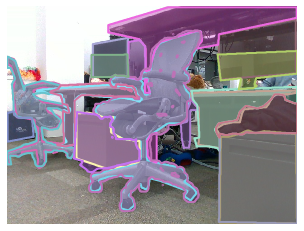

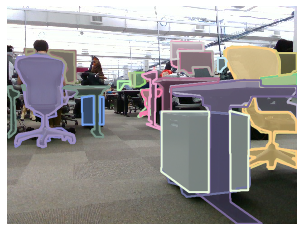

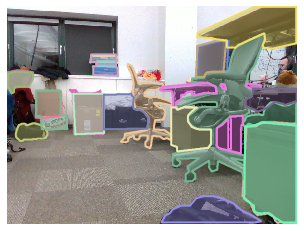

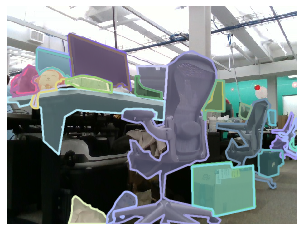

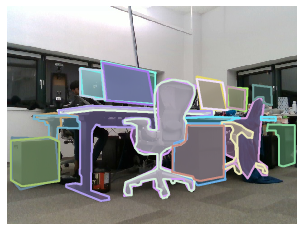

In [3]:
# Display 5 random files with all annotations 
imgIds = coco.getImgIds()
imgs = coco.loadImgs(random.choices(imgIds, k=5))

for x in imgs:
    I = io.imread(os.path.join(images_folder, x['file_name']))
    plt.axis('off')
    plt.imshow(I)
    annIds = coco.getAnnIds(imgIds=[x['id']])
    anns = coco.loadAnns(annIds)
    coco.showAnns(anns)
    plt.show()